# Structural similarity

In [1]:
from rdkit import Chem
from rdkit import RDLogger
import matplotlib.pyplot as plt
import pandas as pd
import gzip
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski
from itertools import chain
from rdkit.Chem import MACCSkeys
import numpy as np
import seaborn as sns

RDLogger.DisableLog('rdApp.error')

In [2]:
# load dataset
suppl = Chem.SDMolSupplier("../data/drugbank.sdf")
drug_bank = [[mol, 'drugbank'] for mol in suppl if mol]

with gzip.open("../data/actives_final.sdf.gz") as sdf:
    supp_actives = Chem.ForwardSDMolSupplier(sdf)
    actives = [[mol, 'acives'] for mol in supp_actives if mol]

with gzip.open("../data/decoys_final.sdf.gz") as sdf:
    supp_decoys = Chem.ForwardSDMolSupplier(sdf)
    decoys = [[mol, 'decoys'] for mol in supp_decoys if mol]

df_db = pd.DataFrame(drug_bank, columns=['Mol', 'Source'])
df_ac = pd.DataFrame(actives, columns=['Mol', 'Source'])
df_dc = pd.DataFrame(decoys, columns=['Mol', 'Source'])

# pick random 877 molecules from decoys in a way to have much diversity as possible
df_dc_small = df_dc.sample(n=877, random_state=42)

df = pd.concat([df_db, df_ac, df_dc_small], ignore_index=True)
df

,Mol,Source
0,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc509f50>,drugbank
1,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc509fc0>,drugbank
2,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a030>,drugbank
3,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a0a0>,drugbank
4,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a110>,drugbank
...,...,...
8866,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc106e30>,decoys
8867,<rdkit.Chem.rdchem.Mol object at 0x7f7dfbfd3e60>,decoys
8868,<rdkit.Chem.rdchem.Mol object at 0x7f7dfbcbfdf0>,decoys
8869,<rdkit.Chem.rdchem.Mol object at 0x7f7dfbdbb680>,decoys


In [3]:
from rdkit.Chem import AllChem

df['FP'] = df['Mol'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=1024))
df

,Mol,Source,FP
0,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc509f50>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc509fc0>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a030>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
3,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a0a0>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a110>,drugbank,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
...,...,...,...
8866,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc106e30>,decoys,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ..."
8867,<rdkit.Chem.rdchem.Mol object at 0x7f7dfbfd3e60>,decoys,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8868,<rdkit.Chem.rdchem.Mol object at 0x7f7dfbcbfdf0>,decoys,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8869,<rdkit.Chem.rdchem.Mol object at 0x7f7dfbdbb680>,decoys,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [4]:
np.save("../data/df.npy", df)

In [5]:
df['MACCS_keys'] = df['Mol'].apply(lambda x: [bool(y) for y in MACCSkeys.GenMACCSKeys(x)])
df

,Mol,Source,FP,MACCS_keys
0,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc509f50>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."
1,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc509fc0>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."
2,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a030>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."
3,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a0a0>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."
4,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a110>,drugbank,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."
...,...,...,...,...
8866,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc106e30>,decoys,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."
8867,<rdkit.Chem.rdchem.Mol object at 0x7f7dfbfd3e60>,decoys,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."
8868,<rdkit.Chem.rdchem.Mol object at 0x7f7dfbcbfdf0>,decoys,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."
8869,<rdkit.Chem.rdchem.Mol object at 0x7f7dfbdbb680>,decoys,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."


In [6]:
df

,Mol,Source,FP,MACCS_keys
0,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc509f50>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."
1,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc509fc0>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."
2,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a030>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."
3,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a0a0>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."
4,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a110>,drugbank,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."
...,...,...,...,...
8866,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc106e30>,decoys,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."
8867,<rdkit.Chem.rdchem.Mol object at 0x7f7dfbfd3e60>,decoys,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."
8868,<rdkit.Chem.rdchem.Mol object at 0x7f7dfbcbfdf0>,decoys,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."
8869,<rdkit.Chem.rdchem.Mol object at 0x7f7dfbdbb680>,decoys,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."


In [7]:
# numbers of molecules by source
df['Source'].value_counts()

Source
drugbank    7117
acives       877
decoys       877
Name: count, dtype: int64

In [8]:
para = Chem.MolFromSmiles("CC(=O)Nc1ccc(O)cc1")
para_fp = AllChem.GetMorganFingerprintAsBitVect(para, 2, nBits=1024)

In [9]:
from rdkit import DataStructs

df['tanimoto'] = df['FP'].apply(lambda x: DataStructs.TanimotoSimilarity(x, para_fp))
df.sort_values(by='tanimoto', ascending=False, ignore_index=True)

,Mol,Source,FP,MACCS_keys,tanimoto
0,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc5b3ed0>,drugbank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",1.000000
1,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc3ccba0>,drugbank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.600000
2,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc3aab90>,drugbank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.517241
3,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc240f20>,drugbank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.421053
4,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc40df50>,drugbank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.416667
...,...,...,...,...,...
8866,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc2373e0>,drugbank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.000000
8867,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc237d80>,drugbank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.000000
8868,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc3ac900>,drugbank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.000000
8869,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc36dfc0>,drugbank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[False, False, False, False, False, False, Fal...",0.000000


In [10]:
similarity_matrix = pd.DataFrame(np.load("../data/similarity_matrix.npy")) 
similarity_matrix
# I have a large number of structures and I want to select those that are least similar to each other and
# to cover as much chemical diversity as possible. 5% most diverse structures are selected.
# D is a distance matrix, where D[i,j] is the distance between the ith and jth structures.
# 8871 structures and 1% is 88 , 5% is 444, 10% is 887



,0,1,2,3,4,5,6,7,8,9,...,8861,8862,8863,8864,8865,8866,8867,8868,8869,8870
0,1.000000,0.371069,0.407143,0.492754,0.115385,0.314685,0.201258,0.078740,0.115000,0.182482,...,0.117647,0.121429,0.111940,0.094203,0.124138,0.138889,0.156716,0.101351,0.155556,0.058824
1,0.371069,1.000000,0.306250,0.415584,0.120482,0.265823,0.260870,0.095588,0.124402,0.160000,...,0.108108,0.134228,0.102740,0.086667,0.143791,0.142857,0.151724,0.143791,0.150685,0.083333
2,0.407143,0.306250,1.000000,0.358621,0.130137,0.721154,0.281690,0.075630,0.156757,0.176923,...,0.117188,0.165354,0.102362,0.109375,0.132353,0.139706,0.168000,0.107914,0.176000,0.054688
3,0.492754,0.415584,0.358621,1.000000,0.101266,0.278912,0.201258,0.087302,0.120603,0.140845,...,0.134328,0.137681,0.103704,0.102190,0.234848,0.138889,0.156716,0.108844,0.147059,0.099237
4,0.115385,0.120482,0.130137,0.101266,1.000000,0.138686,0.152174,0.060606,0.130178,0.111111,...,0.111111,0.126126,0.083333,0.081818,0.082645,0.118644,0.088496,0.100840,0.097345,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8866,0.138889,0.142857,0.139706,0.138889,0.118644,0.140625,0.146154,0.117647,0.096970,0.142857,...,0.100000,0.084906,0.150538,0.123711,0.120370,1.000000,0.141414,0.130841,0.151515,0.120879
8867,0.156716,0.151724,0.168000,0.156716,0.088496,0.161017,0.166667,0.102564,0.075000,0.193548,...,0.160920,0.164835,0.166667,0.123596,0.166667,0.141414,1.000000,0.131313,0.179775,0.094118
8868,0.101351,0.143791,0.107914,0.108844,0.100840,0.106870,0.112782,0.105882,0.104294,0.122642,...,0.112245,0.117647,0.115789,0.113402,0.224490,0.130841,0.131313,1.000000,0.141414,0.063158
8869,0.155556,0.150685,0.176000,0.147059,0.097345,0.200000,0.137097,0.129870,0.101911,0.204301,...,0.159091,0.188889,0.137931,0.122222,0.153061,0.151515,0.179775,0.141414,1.000000,0.105882


# Diversity picking

In [11]:
# dist matrix to diagonal matrix with 0s
np.fill_diagonal(similarity_matrix.values, 0)
similarity_matrix

# Ensure that the distances are represented as float or integer data types, and that the values are positive.
dist_matrix = similarity_matrix.astype(np.float64)
dist_matrix



,0,1,2,3,4,5,6,7,8,9,...,8861,8862,8863,8864,8865,8866,8867,8868,8869,8870
0,0.000000,0.371069,0.407143,0.492754,0.115385,0.314685,0.201258,0.078740,0.115000,0.182482,...,0.117647,0.121429,0.111940,0.094203,0.124138,0.138889,0.156716,0.101351,0.155556,0.058824
1,0.371069,0.000000,0.306250,0.415584,0.120482,0.265823,0.260870,0.095588,0.124402,0.160000,...,0.108108,0.134228,0.102740,0.086667,0.143791,0.142857,0.151724,0.143791,0.150685,0.083333
2,0.407143,0.306250,0.000000,0.358621,0.130137,0.721154,0.281690,0.075630,0.156757,0.176923,...,0.117188,0.165354,0.102362,0.109375,0.132353,0.139706,0.168000,0.107914,0.176000,0.054688
3,0.492754,0.415584,0.358621,0.000000,0.101266,0.278912,0.201258,0.087302,0.120603,0.140845,...,0.134328,0.137681,0.103704,0.102190,0.234848,0.138889,0.156716,0.108844,0.147059,0.099237
4,0.115385,0.120482,0.130137,0.101266,0.000000,0.138686,0.152174,0.060606,0.130178,0.111111,...,0.111111,0.126126,0.083333,0.081818,0.082645,0.118644,0.088496,0.100840,0.097345,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8866,0.138889,0.142857,0.139706,0.138889,0.118644,0.140625,0.146154,0.117647,0.096970,0.142857,...,0.100000,0.084906,0.150538,0.123711,0.120370,0.000000,0.141414,0.130841,0.151515,0.120879
8867,0.156716,0.151724,0.168000,0.156716,0.088496,0.161017,0.166667,0.102564,0.075000,0.193548,...,0.160920,0.164835,0.166667,0.123596,0.166667,0.141414,0.000000,0.131313,0.179775,0.094118
8868,0.101351,0.143791,0.107914,0.108844,0.100840,0.106870,0.112782,0.105882,0.104294,0.122642,...,0.112245,0.117647,0.115789,0.113402,0.224490,0.130841,0.131313,0.000000,0.141414,0.063158
8869,0.155556,0.150685,0.176000,0.147059,0.097345,0.200000,0.137097,0.129870,0.101911,0.204301,...,0.159091,0.188889,0.137931,0.122222,0.153061,0.151515,0.179775,0.141414,0.000000,0.105882


 I have a large number of structures and I want to select those that are least similar to each other and
 to cover as much chemical diversity as possible. 5% most diverse structures are selected.
 D is a distance matrix, where D[i,j] is the distance between the ith and jth structures.
 8871 structures and 1% is 88 , 5% is 444, 10% is 887

In [12]:
# The distance matrix is a square matrix, so the number of rows and columns should be equal.
dist_matrix.shape

# distance matrix have computed distances between all pairs of structures using the Tanimoto similarity metric on fingerprints.
# now we can compute how similar each structure is to all other structures in the dataset.
# our goal is to select a subset of structures that are as diverse as possible.

dist_matrix.sum(axis=1)  # sum of each row

# The sum of the distances between each structure and all other structures in the dataset is called the diversity of the structure.
# The diversity of a structure is the sum of the distances between the structure and all other structures in the dataset.

# The diversity of each structure is stored in the diversity array, and we want to keep indexes of the most diverse structures.
diversity = dist_matrix.sum(axis=1)
diversity = diversity.values

# using the diversity array, we can select the most diverse structures in the dataset.
# The most diverse structures are those with the lowest diversity values.
# The diversity values are sorted in ascending order, and the indices of the sorted diversity values are stored in the sorted_diversity array.
sorted_diversity = diversity.argsort() 
sorted_diversity = sorted_diversity.tolist()
sorted_diversity




[6854,
 6984,
 1199,
 4665,
 7020,
 6878,
 1202,
 7012,
 1379,
 7044,
 4639,
 1378,
 6838,
 7019,
 6868,
 4469,
 6875,
 6998,
 4635,
 1198,
 3951,
 850,
 645,
 2786,
 4668,
 6853,
 1188,
 6876,
 7013,
 4417,
 1040,
 7053,
 1363,
 6843,
 7065,
 6692,
 7055,
 4679,
 4611,
 6855,
 2612,
 2968,
 2773,
 441,
 2365,
 400,
 2697,
 1715,
 318,
 2736,
 3863,
 2936,
 3882,
 477,
 7061,
 2947,
 6864,
 6880,
 1897,
 7015,
 4691,
 322,
 2153,
 1035,
 3408,
 1201,
 3261,
 3962,
 3210,
 7011,
 1045,
 3305,
 2118,
 3604,
 215,
 1757,
 1065,
 4444,
 1592,
 4472,
 118,
 2821,
 4067,
 4516,
 6707,
 6840,
 6824,
 538,
 7016,
 7050,
 1882,
 7058,
 637,
 2338,
 401,
 2582,
 2367,
 3753,
 2648,
 729,
 1844,
 1331,
 6733,
 2058,
 6844,
 4470,
 1669,
 6870,
 3699,
 3859,
 3418,
 2886,
 1568,
 970,
 3888,
 3900,
 3726,
 6987,
 4378,
 906,
 2746,
 3008,
 2493,
 3998,
 2559,
 6650,
 796,
 1931,
 3846,
 1111,
 3462,
 3155,
 1120,
 6726,
 4005,
 4084,
 19,
 1353,
 6884,
 2020,
 1608,
 4166,
 2115,
 2184,
 2237,
 16

In [13]:
# select 100 most diverse structures and save them to a new dataframe
df_most_diverse = df.iloc[sorted_diversity[:100]]
df_most_diverse

,Mol,Source,FP,MACCS_keys,tanimoto
6854,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc237450>,drugbank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.000000
6984,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc23edc0>,drugbank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.000000
1199,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc343530>,drugbank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.000000
4665,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc3e6f10>,drugbank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.000000
7020,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc23fd80>,drugbank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.000000
...,...,...,...,...,...
2582,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc3857e0>,drugbank,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.037037
2367,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc37b8b0>,drugbank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.021277
3753,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc3c1cb0>,drugbank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.068966
2648,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc3874c0>,drugbank,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.000000


pristup z CV

In [14]:
# from df select FP 
drd3_ligands_ecfp = df['FP'].tolist()

In [15]:
def distance_function(index1, index2, *args, fingerprints=drd3_ligands_ecfp,
                      metric=DataStructs.TanimotoSimilarity):
    return 1 - DataStructs.FingerprintSimilarity(fingerprints[index1],
                                                 fingerprints[index2],
                                                 metric=metric)

In [16]:

drd3_ligands = df['Mol'].tolist()

from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
picker = MaxMinPicker()
picked = list(picker.LazyPick(distance_function, len(drd3_ligands), 100))
picked

[6552,
 318,
 441,
 645,
 850,
 1198,
 1199,
 1202,
 1378,
 1379,
 2153,
 2612,
 2697,
 2773,
 3951,
 4639,
 4665,
 6843,
 6854,
 6868,
 6875,
 6984,
 6998,
 7019,
 7020,
 7044,
 2118,
 2786,
 3863,
 2968,
 1201,
 1188,
 6878,
 1322,
 3671,
 2559,
 1704,
 1757,
 2888,
 3407,
 2302,
 515,
 2367,
 375,
 2358,
 6491,
 8264,
 765,
 4691,
 4581,
 7493,
 1815,
 1488,
 1811,
 401,
 1353,
 8172,
 2015,
 746,
 3726,
 1487,
 3967,
 5675,
 4590,
 2880,
 7046,
 1791,
 2434,
 3882,
 5002,
 8162,
 7039,
 1916,
 215,
 2547,
 705,
 1045,
 2647,
 4378,
 7065,
 5971,
 303,
 3299,
 5419,
 911,
 4434,
 3437,
 2415,
 6063,
 1882,
 503,
 3753,
 2052,
 8030,
 8225,
 1340,
 253,
 400,
 2197,
 3305]

In [17]:
# calculate MW and LogP for each molecule in df
df['MW'] = df['Mol'].apply(lambda x: Descriptors.MolWt(x))
df['LogP'] = df['Mol'].apply(lambda x: Descriptors.MolLogP(x))
# HBA and HBD
df['HBA'] = df['Mol'].apply(lambda x: Lipinski.NumHAcceptors(x))
df['HBD'] = df['Mol'].apply(lambda x: Lipinski.NumHDonors(x))
df['TPSA'] = df['Mol'].apply(lambda x: Descriptors.TPSA(x))
df['RB'] = df['Mol'].apply(lambda x: Lipinski.NumRotatableBonds(x))

In [18]:
df

,Mol,Source,FP,MACCS_keys,tanimoto,MW,LogP,HBA,HBD,TPSA,RB
0,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc509f50>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.119266,2180.317,-8.11643,29,28,901.57,66
1,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc509fc0>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.098361,1269.433,-3.10570,16,17,495.89,31
2,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a030>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.118812,1069.238,-4.13203,15,14,435.41,19
3,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a0a0>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.129630,1431.064,-0.50613,16,17,495.67,38
4,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a110>,drugbank,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.058824,1202.635,3.26900,12,5,278.80,15
...,...,...,...,...,...,...,...,...,...,...,...
8866,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc106e30>,decoys,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.066667,535.716,4.63930,5,2,80.90,11
8867,<rdkit.Chem.rdchem.Mol object at 0x7f7dfbfd3e60>,decoys,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.224138,433.582,5.15362,3,2,67.79,5
8868,<rdkit.Chem.rdchem.Mol object at 0x7f7dfbcbfdf0>,decoys,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.097222,531.629,2.18382,6,1,88.27,11
8869,<rdkit.Chem.rdchem.Mol object at 0x7f7dfbdbb680>,decoys,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.142857,369.533,2.31234,3,2,51.36,5


In [19]:
# indexes back to original structures with MW and LogP
df_picked = df.iloc[picked]


In [20]:
df['Picked'] = df.index.isin(picked)

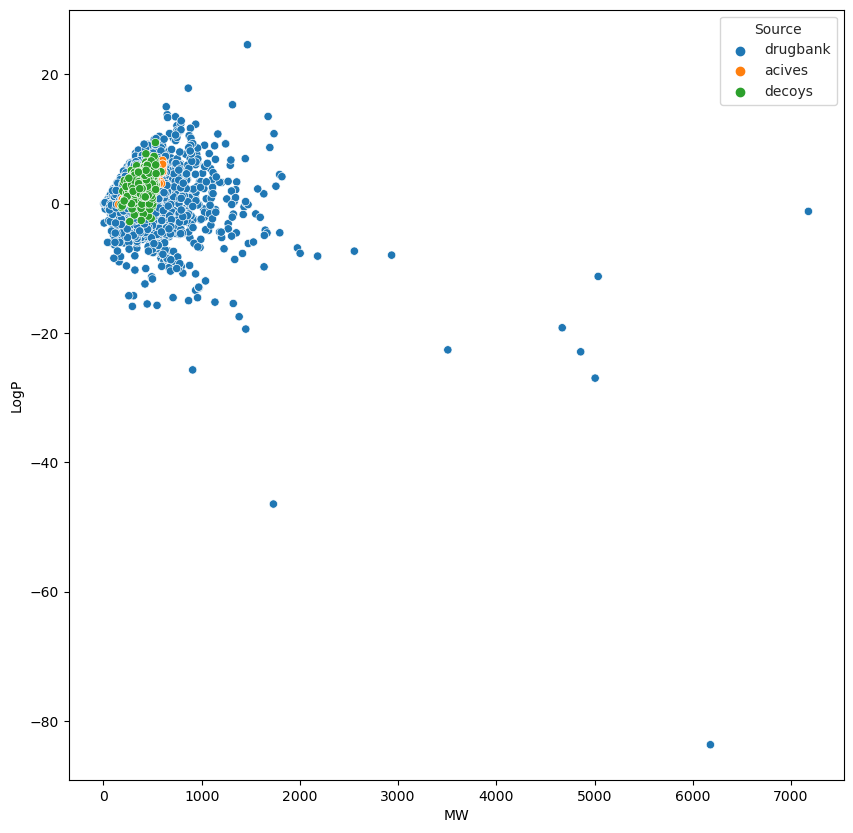

In [21]:
# use df_most_diverse and create plot and visualize from which sourceare the strucutres
# x = MW, y = LogP hue = source
# seaborn plot
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style("whitegrid")
# scatter plot without drugbank
sns.scatterplot(x='MW', y='LogP', hue='Source', data=df)

plt.show()




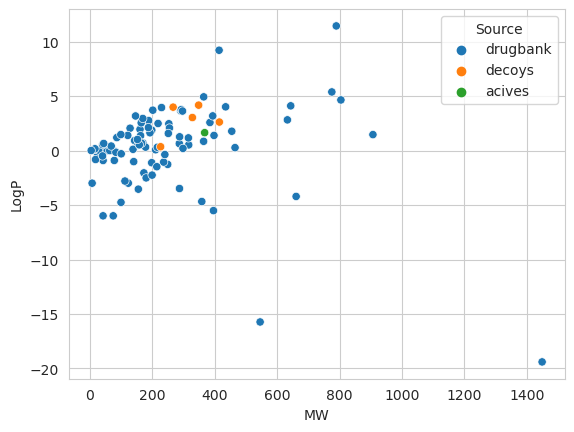

In [22]:
# show also if they are picked using df_picked bu distinguish between picked and not picked
sns.scatterplot(x='MW', y='LogP', hue='Source', data=df_picked)
plt.show()

In [23]:
df

,Mol,Source,FP,MACCS_keys,tanimoto,MW,LogP,HBA,HBD,TPSA,RB,Picked
0,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc509f50>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.119266,2180.317,-8.11643,29,28,901.57,66,False
1,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc509fc0>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.098361,1269.433,-3.10570,16,17,495.89,31,False
2,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a030>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.118812,1069.238,-4.13203,15,14,435.41,19,False
3,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a0a0>,drugbank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.129630,1431.064,-0.50613,16,17,495.67,38,False
4,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a110>,drugbank,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.058824,1202.635,3.26900,12,5,278.80,15,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8866,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc106e30>,decoys,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.066667,535.716,4.63930,5,2,80.90,11,False
8867,<rdkit.Chem.rdchem.Mol object at 0x7f7dfbfd3e60>,decoys,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.224138,433.582,5.15362,3,2,67.79,5,False
8868,<rdkit.Chem.rdchem.Mol object at 0x7f7dfbcbfdf0>,decoys,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.097222,531.629,2.18382,6,1,88.27,11,False
8869,<rdkit.Chem.rdchem.Mol object at 0x7f7dfbdbb680>,decoys,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.142857,369.533,2.31234,3,2,51.36,5,False


In [24]:
# save df to csv
df.to_csv('../data/df.csv')

# save df to numpy array
np.save('../data/df.npy', df)